In [2]:
import numpy as np
import pandas as pd
import requests
import io
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [3]:
df = pd.read_csv('../../data/coolclimate-api-CAzips-singlehouseholds.csv')

In [4]:
df2 = pd.read_csv('../../data/jones-kammen-ca-data.csv')

In [5]:
df.head()

,Unnamed: 0,input_location_mode,input_size,input_income,input_population,input_changed,input_footprint_household_adults,input_footprint_household_children,input_footprint_transportation_num_vehicles,input_footprint_transportation_miles1,input_footprint_transportation_mpg1,input_footprint_transportation_fuel1,input_footprint_transportation_miles2,input_footprint_transportation_mpg2,input_footprint_transportation_fuel2,input_footprint_transportation_miles3,input_footprint_transportation_mpg3,input_footprint_transportation_fuel3,input_footprint_transportation_miles4,input_footprint_transportation_mpg4,input_footprint_transportation_fuel4,input_footprint_transportation_miles5,input_footprint_transportation_mpg5,input_footprint_transportation_fuel5,input_footprint_transportation_miles6,input_footprint_transportation_mpg6,input_footprint_transportation_fuel6,input_footprint_transportation_miles7,input_footprint_transportation_mpg7,input_footprint_transportation_fuel7,input_footprint_transportation_miles8,input_footprint_transportation_mpg8,input_footprint_transportation_fuel8,input_footprint_transportation_miles9,input_footprint_transportation_mpg9,input_footprint_transportation_fuel9,input_footprint_transportation_miles10,input_footprint_transportation_mpg10,input_footprint_transportation_fuel10,input_footprint_transportation_groundtype,input_footprint_transportation_publictrans,input_footprint_transportation_bus,input_footprint_transportation_transit,input_footprint_transportation_commuter,input_footprint_transportation_intercity,input_footprint_transportation_airtype,input_footprint_transportation_airtotal,input_footprint_transportation_airshort,input_footprint_transportation_airmedium,input_footprint_transportation_airlong,input_footprint_transportation_airextended,input_footprint_housing_cdd,input_footprint_housing_hdd,input_footprint_housing_electricity_type,input_footprint_housing_electricity_dollars,input_footprint_housing_electricity_kwh,input_footprint_housing_cleanpercent,input_footprint_housing_naturalgas_type,input_footprint_housing_naturalgas_dollars,input_footprint_housing_naturalgas_therms,input_footprint_housing_naturalgas_cuft,input_footprint_housing_heatingoil_type,input_footprint_housing_heatingoil_dollars,input_footprint_housing_heatingoil_gallons,input_footprint_housing_heatingoil_dollars_per_gallon,input_footprint_housing_squarefeet,input_footprint_housing_watersewage,input_footprint_housing_gco2_per_kwh,input_footprint_shopping_food_meatfisheggs_default,input_footprint_shopping_food_meat_beefpork_default,input_footprint_shopping_food_meat_poultry_default,input_footprint_shopping_food_meat_fish_default,input_footprint_shopping_food_meat_other_default,input_footprint_shopping_food_dairy_default,input_footprint_shopping_food_fruitvegetables_default,input_footprint_shopping_food_cereals_default,input_footprint_shopping_food_otherfood_default,input_footprint_shopping_food_meattype,input_footprint_shopping_food_meatfisheggs,input_footprint_shopping_food_meat_beefpork,input_footprint_shopping_food_meat_poultry,input_footprint_shopping_food_meat_fish,input_footprint_shopping_food_meat_other,input_footprint_shopping_food_dairy,input_footprint_shopping_food_fruitvegetables,input_footprint_shopping_food_cereals,input_footprint_shopping_food_otherfood,input_footprint_shopping_goods_default_furnitureappliances,input_footprint_shopping_goods_default_clothing,input_footprint_shopping_goods_default_other_entertainment,input_footprint_shopping_goods_default_other_office,input_footprint_shopping_goods_default_other_personalcare,input_footprint_shopping_goods_default_other_autoparts,input_footprint_shopping_goods_default_other_medical,input_footprint_shopping_goods_type,input_footprint_shopping_goods_total,input_footprint_shopping_goods_furnitureappliances,input_footprint_shopping_goods_clothing,input_footprint_shopping_goods_other_type,input_footprint_shopping_goods_other_total,input_footprint_shopping_goods_other_entertainmen

In [6]:
print(pd.DataFrame(df.columns.values.tolist()))

                                                     0
0                                           Unnamed: 0
1                                  input_location_mode
2                                           input_size
3                                         input_income
4                                     input_population
5                                        input_changed
6                     input_footprint_household_adults
7                   input_footprint_household_children
8          input_footprint_transportation_num_vehicles
9                input_footprint_transportation_miles1
10                 input_footprint_transportation_mpg1
11                input_footprint_transportation_fuel1
12               input_footprint_transportation_miles2
13                 input_footprint_transportation_mpg2
14                input_footprint_transportation_fuel2
15               input_footprint_transportation_miles3
16                 input_footprint_transportation_mpg3
17        

In [7]:
sum(df.isna().values)
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]
rows_with_NaN.iloc[:, range(12,16)].shape
print('There are', rows_with_NaN.iloc[:, range(12,16)].shape[0], 'entries with NaN values.')

There are 138 entries with NaN values.


In terms of the granularity, each row of data represents household size of 1 and their inputs in the CoolClimate calculator.

In [16]:
df.iloc[:,95].unique()

array([ 544.154441,  525.848233,  518.041749, ..., 1580.673123,
       1747.557822, 1399.578808])

Text(0.5, 1.0, 'Total v housing space')

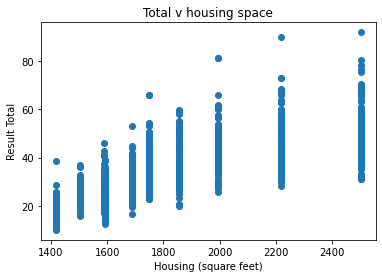

In [10]:
import matplotlib.pyplot as plt
X = df.iloc[:,65] # input_footprint_housing_squarefeet
y = df['result_grand_total']
plt.scatter(X, y)
plt.xlabel('Housing (square feet)')
plt.ylabel('Result Total')
plt.title('Total v housing space')

Text(0.5, 1.0, 'Total result vs shopping goods tota')

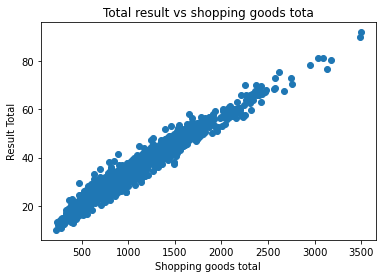

In [20]:
X = df['input_footprint_shopping_goods_total'] #95
y = df['result_grand_total']
plt.scatter(X, y)
plt.xlabel('Shopping goods total')
plt.ylabel('Result Total')
plt.title('Total result vs shopping goods tota')

Text(0.5, 1.0, 'Total result vs shopping goods tota')

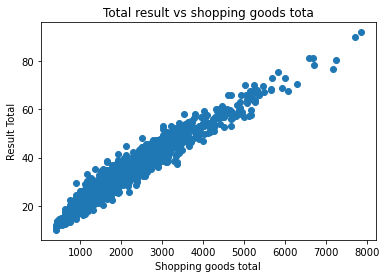

In [19]:
X = df['input_footprint_shopping_services_total'] #106
y = df['result_grand_total']
plt.scatter(X, y)
plt.xlabel('Shopping services total')
plt.ylabel('Result Total')
plt.title('Total result vs shopping services total')

Text(0.5, 1.0, 'Total result vs shopping services total')

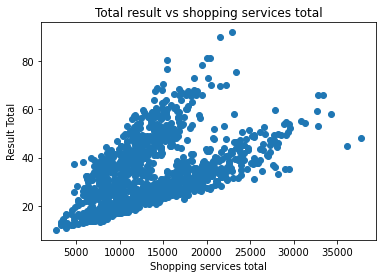

In [22]:
X = df['input_takeaction_more_efficient_vehicle_miles_new'] #118
y = df['result_grand_total']
plt.scatter(X, y)
plt.xlabel('More efficient vehicles')
plt.ylabel('Result Total')
plt.title('Total result vs shopping services total')

In [13]:
import statsmodels.api as sm

In [23]:
X = df[['input_takeaction_more_efficient_vehicle_miles_new']]
y = df[['result_grand_total']]
X_const = sm.add_constant(X)
sn_wf_model = sm.OLS(y,X_const)
sn_wf_results = sn_wf_model.fit()
sn_wf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     result_grand_total   R-squared:                       0.267
Model:                            OLS   Adj. R-squared:                  0.267
Method:                 Least Squares   F-statistic:                     457.1
Date:                Thu, 19 Nov 2020   Prob (F-statistic):           1.01e-86
Time:                        23:51:20   Log-Likelihood:                -4848.4
No. Observations:                1256   AIC:                             9701.
Df Residuals:                    1254   BIC:                             9711.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                15.6103      0.868     17.989      0.000      13.908      17.313
input_takeaction_more_efficient_vehicle_miles_new     0.0013   5.97e-05     21.380      0.000       0.001       0.001
==============================================================================
Omnibus:                      192.233   Durbin-Watson:                   0.178
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              284.311
Skew:                           1.124   Prob(JB):                     1.83e-62
Kurtosis:                       3.617   Cond. No.                     3.89e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.89e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""